In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [216]:
# config = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/configuration")
config = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/configuration")
display(config)

,param_key,param_value
0,event_type,other
1,num_events,1000
2,saved_events,521
3,interacting_events,1000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,ATPC


In [217]:
# parts = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Bi.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Tl.h5", "MC/particles")
parts = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Bi_nat_25bar.h5", "MC/particles")
parts = parts[parts.primary == 1]
# parts = parts[parts.particle_id == 1]
# parts = parts[parts.initial_z<0]
parts.describe()

,event_id,particle_id,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,final_y,final_z,final_t,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length
count,200000.000000,200000.000000,200000.0,200000.0,200000.000000,200000.000000,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.0,200000.0,200000.000000,200000.000000
mean,49999.500000,1.500000,1.0,0.0,-1.835881,-5.010840,4.846052,0.0,-1.817445,-5.022544,4.827102,0.128726,-0.002824,-0.001462,-0.002643,0.0,0.0,0.0,1.228915,57.199299
std,28867.585627,0.500001,0.0,0.0,1502.752197,1499.324463,1729.248291,0.0,1502.755005,1499.328613,1729.299316,0.076714,1.020789,1.020797,1.023006,0.0,0.0,0.0,0.603786,32.991787
min,0.000000,1.000000,1.0,0.0,-2999.501465,-2998.642822,-2999.915527,0.0,-3000.584717,-3000.467529,-3000.771729,0.000004,-2.902299,-2.914555,-2.896947,0.0,-0.0,0.0,0.000012,0.000008
25%,24999.750000,1.000000,1.0,0.0,-1217.574158,-1216.986420,-1486.959351,0.0,-1217.434204,-1217.344513,-1487.636597,0.068143,-0.704172,-0.707197,-0.707597,0.0,0.0,0.0,0.758920,30.930991
50%,49999.500000,1.500000,1.0,0.0,-2.107502,-0.358333,9.825714,0.0,-2.385119,0.122788,9.788556,0.119730,-0.002601,-0.004653,-0.004435,-0.0,-0.0,0.0,1.228915,55.596598
75%,74999.250000,2.000000,1.0,0.0,1214.339020,1207.518646,1502.151428,0.0,1214.187225,1207.413666,1501.608063,0.182306,0.700115,0.702028,0.704413,0.0,0.0,0.0,1.698910,81.356060
max,99999.000000,2.000000,1.0,0.0,2999.416992,2997.472900,2999.986084,0.0,3000.326660,3000.144531,3000.971680,0.473786,2.899342,2.916561,2.912793,0.0,-0.0,0.0,2.457818,163.273499


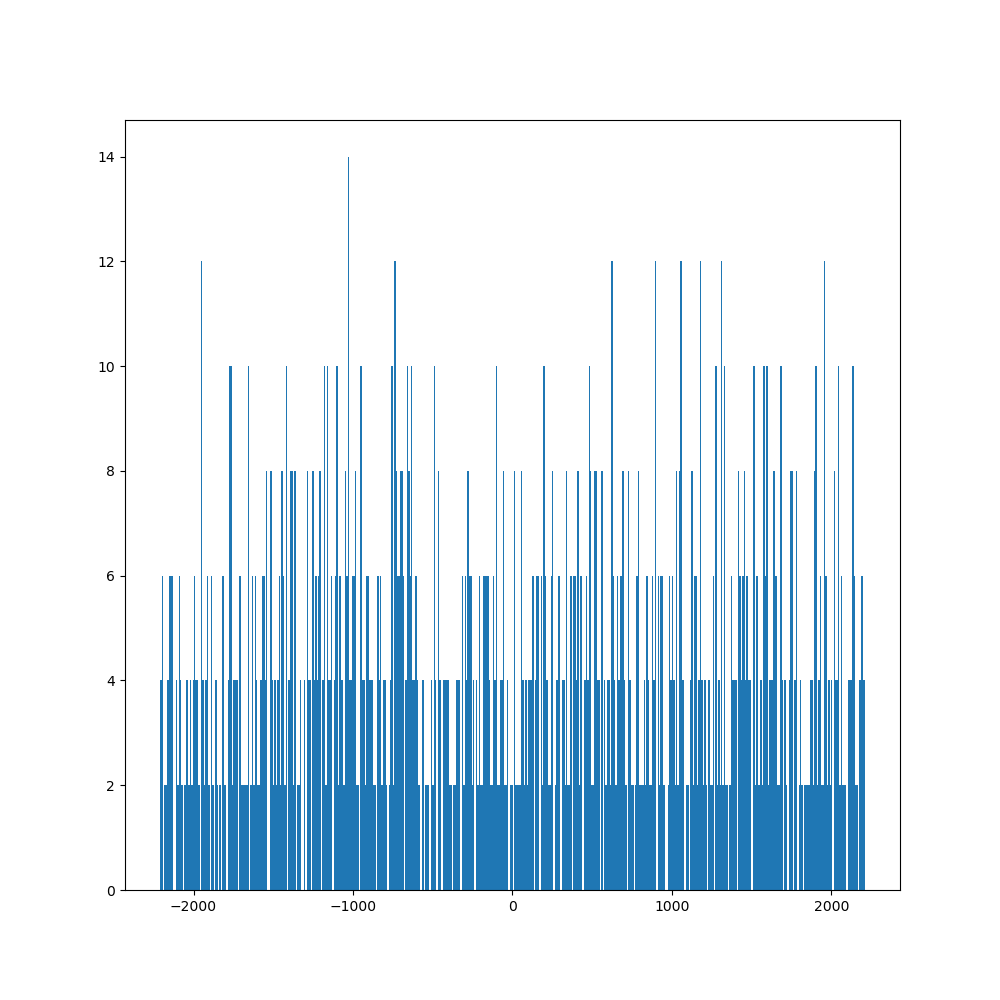

In [210]:
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(parts.initial_x, parts.initial_y, parts.initial_z)
plt.hist(parts.initial_z, bins = 500);

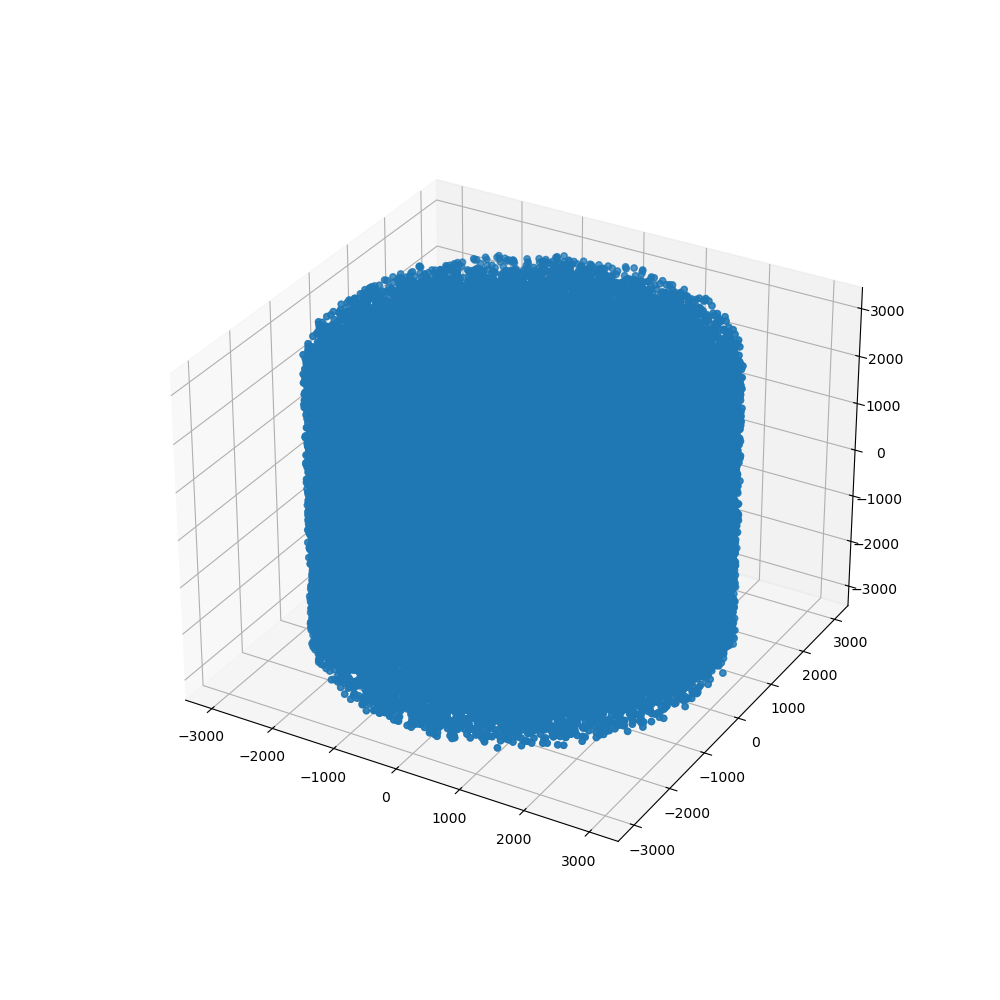

In [218]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# parts = parts[parts.initial_z > 0]
ax.scatter(parts.initial_x, parts.initial_y, parts.initial_z)

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_42372/1902452738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parts_cut['adjusted_max_abs'] = 3000 - parts_cut[['initial_x', 'initial_y', 'initial_z']].abs().max(axis=1)


,initial_x,initial_y,initial_z,adjusted_max_abs
105,-2463.387939,393.043365,854.445801,536.612061
835,-175.136703,-285.985199,-2675.138428,324.861572
1192,-2478.680664,-950.570862,-764.698669,521.319336
2224,852.436890,-1517.398438,-1309.736084,1482.601562
2566,-516.058105,1976.849731,-1189.718506,1023.150269
...,...,...,...,...
5639845,-1973.343750,-1300.226562,-1040.812134,1026.656250
5640246,-1195.129883,2352.344238,-2410.407715,589.592285
5640936,-2772.010010,-2080.292969,260.537109,227.989990
5641522,1225.723389,-1202.138672,-1889.536133,1110.463867


,initial_x,initial_y,initial_z,adjusted_max_abs
2224,852.436890,-1517.398438,-1309.736084,1482.601562
3250,954.598877,1850.041504,1115.041382,1149.958496
4049,-20.008133,-1668.506104,187.440811,1331.493896
4652,2430.767822,-2205.196289,-1973.888062,569.232178
5935,2663.312500,594.388062,1689.848877,336.687500
...,...,...,...,...
5637576,1660.856689,2106.623779,234.071381,893.376221
5638631,-1965.271118,883.095886,2355.580566,644.419434
5639201,-200.615891,1896.015625,-43.915009,1103.984375
5639845,-1973.343750,-1300.226562,-1040.812134,1026.656250


10000


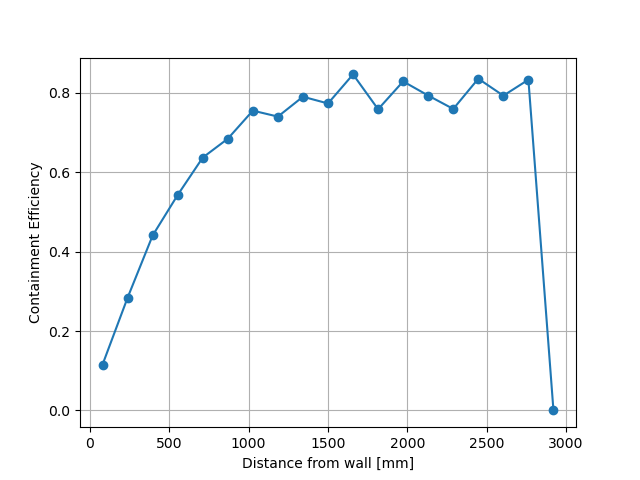

In [ ]:
hits = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/hits")
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
hit_tot_energy = hit_tot_energy[ (hit_tot_energy.hit_tot_energy > 2.433) & (hit_tot_energy.hit_tot_energy < 2.48) ]

parts_cut = parts[parts.event_id.isin(hit_tot_energy.event_id.unique())]
parts_cut['adjusted_max_abs'] = 3000 - parts_cut[['initial_x', 'initial_y', 'initial_z']].abs().max(axis=1)

parts['adjusted_max_abs'] = 3000 - parts[['initial_x', 'initial_y', 'initial_z']].abs().max(axis=1)

display(parts[['initial_x', 'initial_y', 'initial_z', 'adjusted_max_abs']])
display(parts_cut[['initial_x', 'initial_y', 'initial_z', 'adjusted_max_abs']])

print(len(parts['adjusted_max_abs']))

plt.figure()


# Define shared bin edges
bins = np.linspace(0,3000, 20)

# Compute histograms
counts1, edges = np.histogram(parts_cut['adjusted_max_abs'], bins=bins)
counts2, _     = np.histogram(parts['adjusted_max_abs'],     bins=bins)

# Avoid division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.true_divide(counts1, counts2)
    ratio[~np.isfinite(ratio)] = 0  # set inf and NaN to 0

# Compute bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Plot
plt.plot(bin_centers, ratio, marker='o', linestyle='-')
plt.xlabel('Distance from wall [mm]')
plt.ylabel('Containment Efficiency')
plt.grid(True)
plt.show()


In [201]:
table_1bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_1bar_merged.h5", "MC/E")
table_5bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_5bar_merged.h5", "MC/E")
table_10bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_10bar_merged.h5", "MC/E")
table_15bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_15bar_merged.h5", "MC/E")
# table_25bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_25bar_mergedv1.h5", "MC/E")

table_1bar.drop_duplicates()
table_5bar.drop_duplicates()
table_10bar.drop_duplicates()
table_15bar.drop_duplicates()
table_25bar.drop_duplicates()

# table_5bar["initial_x"] = np.abs(table_5bar["initial_x"]) - 3508/2.0
# table_25bar["initial_x"] = np.abs(table_25bar["initial_x"]) - 2052/2.0

# table_5bar["initial_x"] = np.abs(table_5bar["initial_x"]) 
# table_25bar["initial_x"] = np.abs(table_25bar["initial_x"])

# table_5bar.describe()
table_25bar.describe()

# print(len(table_5bar), len(table_10bar), len(table_15bar), len(table_25bar))

,event_id,energy,prim_gamma_E,initial_x,initial_y,initial_z,final_x,final_y,final_z
count,9.955400e+04,99554.000000,99554.000000,99554.000000,99554.000000,99554.000000,99554.000000,99554.000000,99554.000000
mean,2.206788e+09,2.430267,2.465435,-25.290686,48.939520,-1.424785,-16.043203,91.664916,-17.426362
std,1.374731e+09,0.044733,0.127071,1051.657236,986.634797,930.367087,2020.137274,1690.251532,2092.523654
min,1.600000e+06,2.300001,1.284497,-1626.000000,-1626.000000,-1626.000000,-261748.000000,-234221.000000,-270480.000000
25%,1.011600e+09,2.447687,2.447687,-1053.000000,-714.000000,-609.000000,-520.000000,-361.000000,-421.000000
50%,2.104600e+09,2.447687,2.447687,-54.000000,52.500000,-47.000000,36.000000,167.000000,-58.000000
75%,3.350600e+09,2.447687,2.447687,868.000000,820.000000,688.000000,484.000000,486.000000,410.000000
max,4.996600e+09,2.599878,3.621966,1626.000000,1626.000000,1626.000000,250809.000000,250646.000000,273143.000000


[]

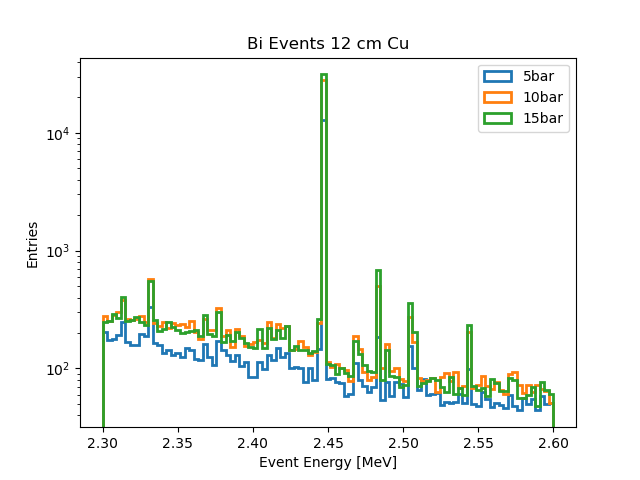

In [203]:
plt.figure()

plt.hist(table_5bar.energy,  histtype="step", bins = np.linspace(2.3,2.6,100), label = "5bar",  linewidth=2, density = False);
plt.hist(table_10bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "10bar", linewidth=2, density = False);
plt.hist(table_15bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "15bar", linewidth=2, density = False);
# plt.hist(table_25bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "25bar", linewidth=2, density = False);
plt.legend()
plt.xlabel("Event Energy [MeV]")
plt.ylabel("Entries")
plt.title("Bi Events 12 cm Cu")
plt.semilogy()


Text(0.5, 1.0, 'Bi Events 12cm Cu')

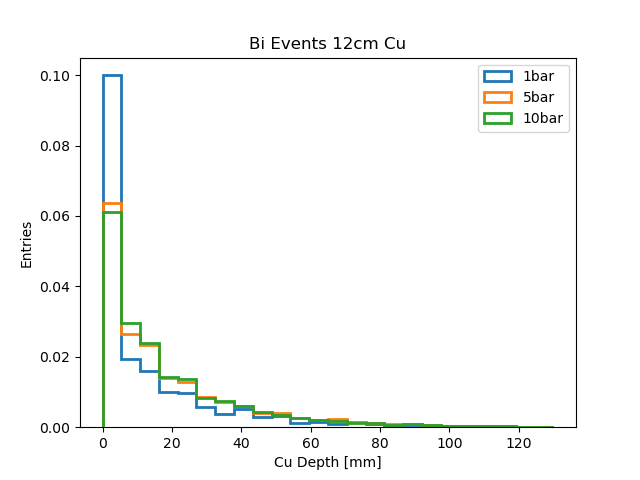

In [205]:
plt.figure()

plt.hist(np.abs(table_1bar.initial_x) - 6000/2.0 , histtype="step",  bins = np.linspace(0, 130, 25), label = "1bar", linewidth=2, density=True);
plt.hist(np.abs(table_5bar.initial_x) - 3508/2.0 , histtype="step",  bins = np.linspace(0, 130, 25), label = "5bar", linewidth=2, density=True);
plt.hist(np.abs(table_10bar.initial_x) - 2784/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "10bar", linewidth=2, density=True);
# plt.hist(np.abs(table_15bar.initial_x) - 2432/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "15bar", linewidth=2, density=True);
# plt.hist(np.abs(table_25bar.initial_x) - 2052/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "25bar", linewidth=2, density=True);
# plt.hist(table_25bar.initial_x, histtype="step",  bins = 500, label = "25bar", linewidth=2, density=True);
plt.legend()
plt.xlabel("Cu Depth [mm]")
plt.ylabel("Entries")
plt.title("Bi Events 12cm Cu")
# plt.semilogy()

Text(0.5, 1.0, 'Bi Events 12cm Cu')

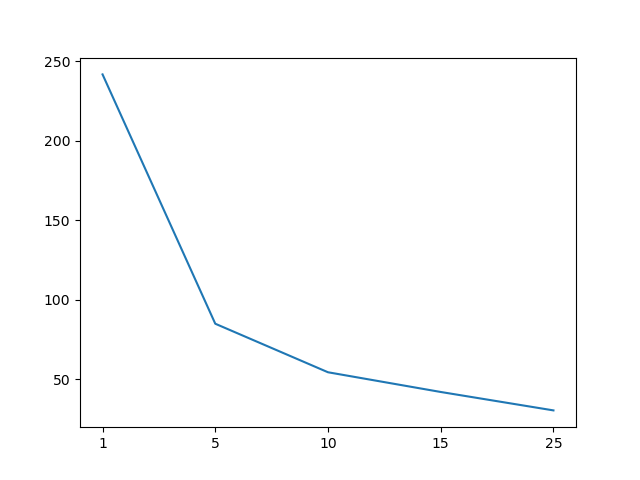

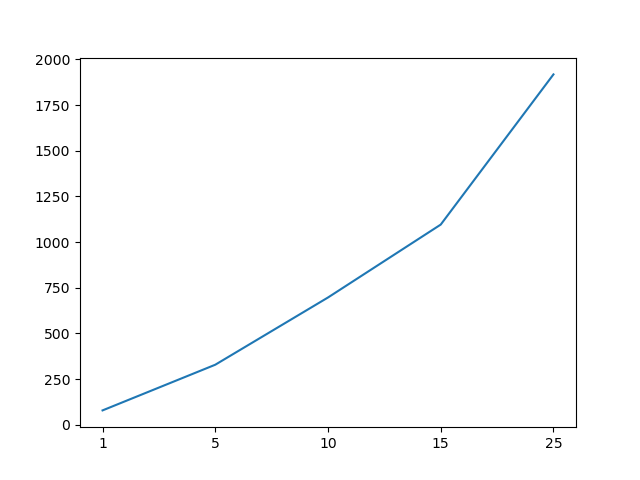

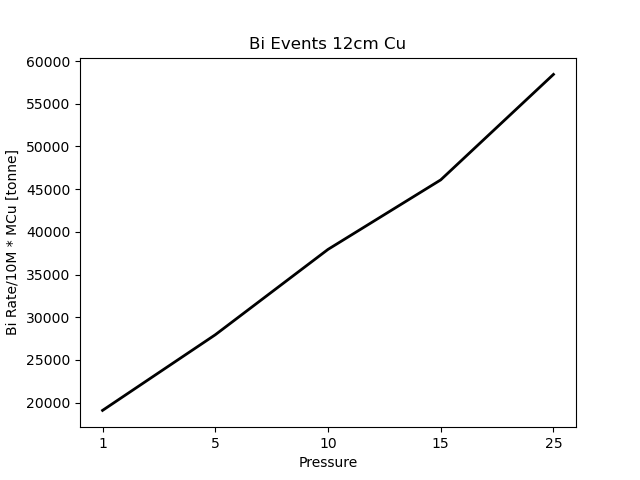

In [184]:
def CalcMass(det_size):
    rho_Cu   = 8960 # kg/m^3x
    return rho_Cu * ( (det_size+2*12e-2)**3 - det_size**3 )

Int_Win_Bi = np.array([79, 329, 697, 1096, 1918])

MCu = np.array([6.000, 3.508, 2.784, 2.432, 2.052])
MCu = CalcMass(MCu)

plt.figure()

pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, MCu/1000)

plt.figure()

pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, Int_Win_Bi)

plt.figure()

pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, Int_Win_Bi *  MCu/1000, linewidth = 2, c ="k")
plt.xlabel("Pressure")
plt.ylabel("Bi Rate/10M * MCu [tonne]")
plt.title("Bi Events 12cm Cu")


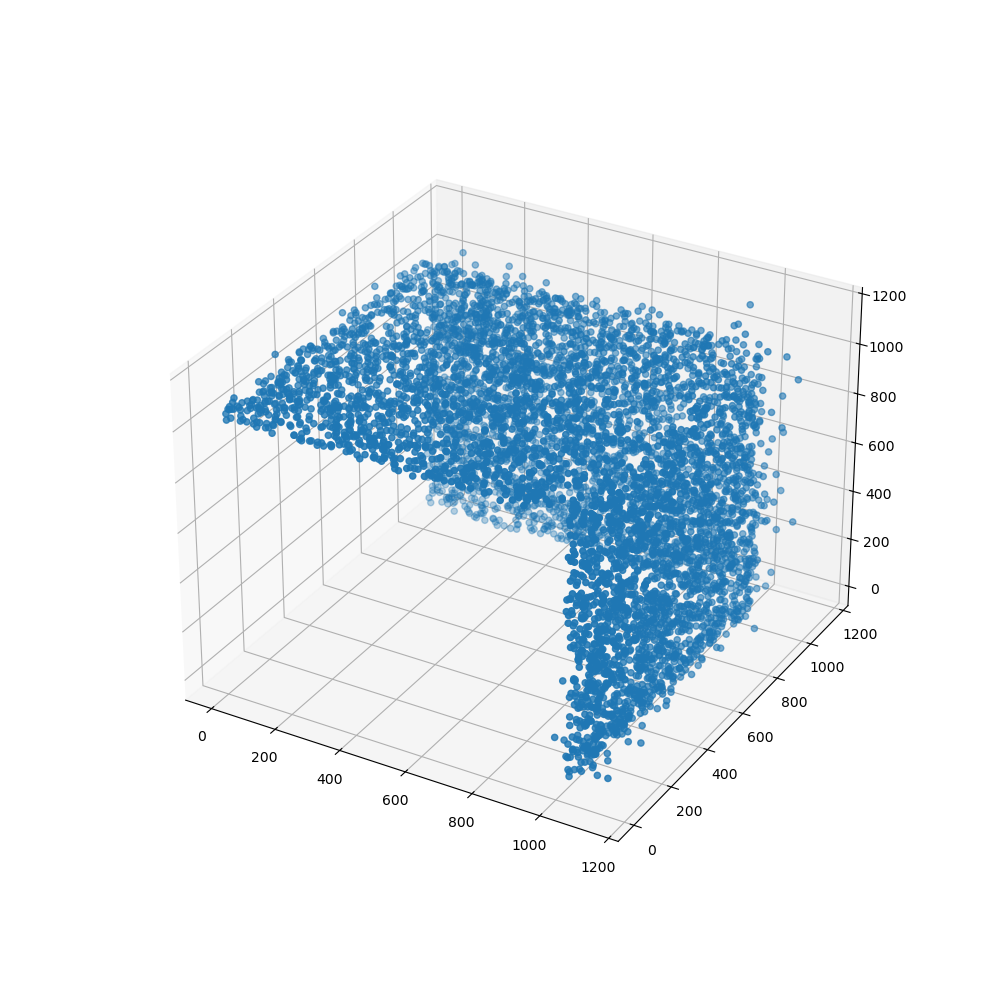

In [167]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
table_25bar = table_25bar[ (table_25bar.initial_x > 0) & (table_25bar.initial_y > 0) & (table_25bar.initial_z > 0) ]
ax.scatter(table_25bar.initial_x, table_25bar.initial_y, table_25bar.initial_z)
# plt.hist(table_25bar.initial_x, histtype="step", bins = 100, label = "10bar", linewidth=2);
# ax.scatter(1557, 831, 1037, "x", s=50)

In [222]:
# Calc Det Mass
def CalcDetMass(Pressure, M):

    density = 5.987*Pressure
    return np.cbrt((4 * M) / (np.pi * density))

print("Enriched")
print("1  bar:", CalcDetMass(1,  1000/0.9))
print("5  bar:", CalcDetMass(5,  1000/0.9))
print("10 bar:", CalcDetMass(10, 1000/0.9))
print("15 bar:", CalcDetMass(15, 1000/0.9))
print("25 bar:", CalcDetMass(25, 1000/0.9))

print("\nNatural")
print("1  bar:", CalcDetMass(1,  1000/0.09))
print("5  bar:", CalcDetMass(5,  1000/0.09))
print("10 bar:", CalcDetMass(10, 1000/0.09))
print("15 bar:", CalcDetMass(15, 1000/0.09))
print("25 bar:", CalcDetMass(25, 1000/0.09))

Enriched
1  bar: 6.182338549679528
5  bar: 3.6154535165800286
10 bar: 2.869587357780632
15 bar: 2.5068154576114123
25 bar: 2.1143300428328176

Natural
1  bar: 13.31944463695098
5  bar: 7.789258476317778
10 bar: 6.182338549679528
15 bar: 5.400770183386178
25 bar: 4.555185990455621
